# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [108]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [110]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [111]:
df_url =pd.read_csv('image-predictions.tsv', sep = '\t')
df_url.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
597,679530280114372609,https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg,1,dalmatian,0.750256,True,jaguar,0.169007,False,zebra,0.006481,False
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False
718,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False
1180,738166403467907072,https://pbs.twimg.com/media/Cj5-aUQUgAAb43p.jpg,2,keeshond,0.878886,True,Norwegian_elkhound,0.086659,True,malamute,0.021280,True
883,698907974262222848,https://pbs.twimg.com/media/CbMFFssWIAAyuOd.jpg,3,German_short-haired_pointer,0.983131,True,bluetick,0.005558,True,curly-coated_retriever,0.003322,True
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
1042,712438159032893441,https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg,1,ice_bear,0.869477,False,Great_Pyrenees,0.069457,True,Labrador_retriever,0.024740,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [112]:
with open ('tweet-json.txt') as file:
    df = pd.DataFrame((json.loads(line) for line in file), columns = ['id', 'favorite_count', 'retweet_count'])

df.columns = ['tweet_id', 'favorites', 'retweets'] 
df.set_index('tweet_id', inplace = True)
df.sample(8)

,favorites,retweets
tweet_id,,
666273097616637952,184,82
762464539388485633,11503,4839
697259378236399616,3611,1136
813217897535406080,20783,8476
881268444196462592,23501,5358
674805413498527744,934,391
685681090388975616,2069,140
672082170312290304,1003,402


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [113]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### <font color='green'>Here we seee 78 reply tweets and 181 retweets, also the expanded_url column has incomplete data.</font> 

#### <font color='green'>Further assesment of the expanded_url column by checking for duplicate values</font> 

In [114]:
df_twitter.expanded_urls.duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

#### <font color='green'>The above output shows there are 137 duplicate urls. I want to know if the duplicated_urls have any impact on my tweet_id, i.e checking to see if duplicate expanded_urls are pointing to the same tweet_id</font> 

In [115]:
df_twitter.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

#### <font color='green'>From the above code we see that there are no duplicate tweet_id meaning the tweets that have the same expanded_url are not referring to the same tweet, these duplicated urls might be for reply tweets or retweets</font> 

### Assessing the df_url for images and predictions

In [116]:
df_url.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### <font color='green'> check for rows without images</font> 

In [117]:
df_url.jpg_url.isnull().value_counts()

False    2075
Name: jpg_url, dtype: int64

#### <font color='green'>The above result shows there is no row without an image.</font> 

#### <font color='green'>To have an idea of how many dogs tweets include a dog stage.</font> 

In [118]:
df_twitter.query('doggo =="doggo" | floofer =="floofer" | pupper =="puper" | puppo =="puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,11,10,None,doggo,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
1204,716080869887381504,NaN,NaN,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super majestic doggo and a sunset 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716080869...,11,10,None,doggo,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None


#### <font color='green'>The above result shows only 135 dogs have been properly classified umder a dog stage..</font> 

#### <font color='green'>Check for tweets with more than one dog stage.</font> 

In [119]:
df_twitter.query('doggo =="doggo" & floofer !="None" or pupper !="None" & puppo =="puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


## Quality issues

1. The following columns:'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are not useful.
  
2. The data contains retweets, we only want original tweets.
  
3. Timestamp has a wrong datatype.

4. The df_url table has unclear/non descriptive column names.

5. Some of the dogs weren't classified according to the dog categories? 

6. Some of the Denominators are not correct as they have values less than 10 when all denminator values should be 10

7. Some of the Numerators are not correct as they have zero values.

8. Some Dogs have no Name



## Tidiness issues

1. The three tables contain related data that need to be merged into one.
2. Dog Classification into doggo, fluffer, pupper and puppo should be in one column for easy analysis


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

#### <font color='green'>Tidines  Issue 1: First, I would like to merge all the dataframes into one before continuing the cleaning process. To do this, i need to confirm that the column to be used for merge tweet_id has the same name and data type across all 3 dataframes.</font> 

In [120]:
df_url.tweet_id.dtype

dtype('int64')

#### <font color='green'>merging the first two dataframes</font> 

In [121]:
dftwitterandurl = pd.merge(df_twitter, df_url, on = 'tweet_id', how = 'outer')
dftwitterandurl.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


#### <font color='green'>merging with the 3rd dataframe.</font> 

In [122]:
all3dataframes = pd.merge(dftwitterandurl, df, on = 'tweet_id', how = 'outer')
all3dataframes.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0


#### <font color='green'> Make copy of merged original pieces of data </font>

In [123]:
masterdata = all3dataframes.copy()
masterdata.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0


#### <font color='green'> TIDINESS ISSUE 2: Place all dog classifications under one column 'dog_stage' and drop all other dog classification columns. </font>

In [124]:
# CODE
for index, column in masterdata.iterrows():
    for word in ['doggo', 'floofer', 'puppo', 'pupper']:
        if word.lower() in str(masterdata.loc[index, 'text']).lower():
            masterdata.loc[index, 'dog_stage'] = word.title()

In [125]:
# CODE
masterdata.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis = 1, inplace = True)
# TEST
masterdata.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0,NaN


### <font color='green'>ISSUE 1: I would be dropping these 4 columns with wrong datatypes as I won't be needing them.</font> 

In [126]:
# CODE
masterdata.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [127]:
# TEST
masterdata.shape

(2356, 23)

### <font color='green'>ISSUE 2: Since we dont want retweets and reply tweets in our analysis, I would be removing rows that are retweets.</font> 

In [128]:
masterdata.query('retweeted_status_id == retweeted_status_id')

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage
19,888202515573088257,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,...,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,NaN,NaN,NaN
32,886054160059072513,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,https://twitter.com/dog_rates/status/886053434...,12,10,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,108.0,NaN
36,885311592912609280,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,...,True,seat_belt,0.057091,False,pug,0.011933,True,0.0,19297.0,NaN
68,879130579576475649,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7181.0,NaN
73,878404777348136964,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1349.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1110.0,NaN
1043,743835915802583040,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,https://twitter.com/dog_rates/status/667138269...,10,10,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2387.0,NaN
1242,711998809858043904,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,https://twitter.com/twitter/status/71199827977...,12,10,None,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,...,False,kuvasz,0.059895,True,book_jacket,0.046638,False,0.0,138.0,NaN
2259,667550904950915073,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,https://twitter.com/dogratingrating/status/667...,12,10,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,...,False,vizsla,0.000081,True,collie,0.000069,True,0.0,37.0,NaN


In [129]:
# CODE
masterdata.drop((masterdata.query('retweeted_status_id == retweeted_status_id').index), inplace=True)


#### <font color='green'> To confirm that the desired action was carried out.</font> 

In [130]:
# TEST
masterdata.shape

(2175, 23)

### <font color='green'> ISSUE 3: Change timestamp datatype from object to datetime.</font> 

In [131]:
# CODE
masterdata['timestamp'] = pd.to_datetime(masterdata['timestamp'])

In [132]:
# TEST
masterdata['timestamp'].dtype

datetime64[ns, UTC]

### <font color='green'> ISSUE 4: Rename Colums with confusing names.</font> 

In [133]:
# View current column_names.
masterdata.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweets',
       'dog_stage'],
      dtype='object')

In [134]:
# CODE
masterdata.rename(columns = {'img_num':'image_sequence_no_within_url' , 'p1': 'image_prediction_1' ,'p1_conf': 'prediction1_confidence', 'p1_dog':'prediction1_is_a_dog','p2': 'image_prediction_2' , 'p2_conf': 'prediction2_confidence','p2_dog':'prediction2_is_a_dog', 'p3': 'image_prediction_3' , 'p3_conf': 'prediction3_confidence','p3_dog':'prediction3_is_a_dog'}, inplace=True)
# TEST
masterdata.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,prediction1_is_a_dog,image_prediction_2,prediction2_confidence,prediction2_is_a_dog,image_prediction_3,prediction3_confidence,prediction3_is_a_dog,favorites,retweets,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0,NaN


### <font color='green'> ISSUE 5: all tweets without dog stage should be filled/categorised as unknown .</font> 

In [135]:
# CODE
masterdata['dog_stage'].replace(['None'], 'unknown', inplace=True)

In [136]:
masterdata.dog_stage.fillna('unknown', inplace=True)

In [137]:
# TEST
masterdata.dog_stage.value_counts()

unknown    1790
Pupper      260
Doggo        82
Puppo        33
Floofer      10
Name: dog_stage, dtype: int64

### <font color='green'> ISSUE 6: Rating Denominators with values less than or greater than 10 should be replaced by the value (10).</font> 

In [138]:
#### CODE
#first I'll check to see how many denominators do not have a value of 10
masterdata[masterdata.rating_denominator!= 10].count()[0]

22

In [139]:
masterdata.query('rating_denominator !=10')[['rating_denominator', 'prediction1_is_a_dog']]

,rating_denominator,prediction1_is_a_dog
313,0,NaN
342,15,NaN
433,70,True
516,7,True
902,150,True
1068,11,True
1120,170,False
1165,20,True
1202,50,True
1228,90,True


In [140]:
masterdata.rating_denominator.replace(to_replace = [50, 11, 20, 80, 15, 70, 7, 150, 170, 0, 90, 40, 130, 110, 16, 120, 2], value = 10, inplace=True)

In [141]:
masterdata.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [142]:
masterdata.sample(3)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,prediction1_is_a_dog,image_prediction_2,prediction2_confidence,prediction2_is_a_dog,image_prediction_3,prediction3_confidence,prediction3_is_a_dog,favorites,retweets,dog_stage
276,840632337062862849,2017-03-11 18:35:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maddie and Gunner. They are consi...,NaN,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,...,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True,9761.0,1972.0,unknown
328,833722901757046785,2017-02-20 17:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,NaN,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,...,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True,22585.0,3636.0,unknown
321,834209720923721728,2017-02-22 01:14:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,NaN,https://twitter.com/dog_rates/status/834209720...,12,10,Wilson,https://pbs.twimg.com/media/C5O1UAaWIAAMBMd.jpg,...,True,Pekinese,0.197861,True,Labrador_retriever,0.008654,True,22594.0,5476.0,unknown


### <font color='green'> ISSUE 7: Replace Numerators with zero values.</font>

In [153]:
df_numerator = masterdata.query('rating_numerator == 0 | rating_numerator > 30').rating_numerator.value_counts()
df_numerator

420     2
99      1
144     1
121     1
143     1
44      1
60      1
45      1
80      1
50      1
666     1
204     1
1776    1
165     1
75      1
84      1
960     1
182     1
88      1
Name: rating_numerator, dtype: int64

In [154]:
numerator_list = df_numerator.index.get_level_values(0).tolist()
numerator_list

[420,
 99,
 144,
 121,
 143,
 44,
 60,
 45,
 80,
 50,
 666,
 204,
 1776,
 165,
 75,
 84,
 960,
 182,
 88]

In [155]:
masterdata.rating_numerator.replace(to_replace = [420,99,144,121,143,44,60,45,80,50,666,204,1776,165,75,84,960,182,88] , value = 11, inplace=True)

In [156]:
# TEST
masterdata.rating_numerator.value_counts()

12    500
11    448
10    442
13    307
9     156
8      98
7      54
14     43
5      36
6      32
3      19
4      17
2       9
1       8
27      1
15      1
17      1
20      1
26      1
24      1
Name: rating_numerator, dtype: int64

In [157]:
masterdata.shape

(2175, 23)

### <font color='green'> ISSUE 8: Wrong dog names, while Some Dogs have no Name.</font> 

#### CODE
some of the tweet text do not contain dog names,considering that there are images which arent actually images of dogs, we would be leaving these as is.

In [158]:
#### TEST
masterdata.prediction1_is_a_dog.value_counts()

True     1477
False     517
Name: prediction1_is_a_dog, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [159]:
masterdata.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [160]:
masterdata.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,prediction1_is_a_dog,image_prediction_2,prediction2_confidence,prediction2_is_a_dog,image_prediction_3,prediction3_confidence,prediction3_is_a_dog,favorites,retweets,dog_stage
1442,696754882863349760,2016-02-08 17:58:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Reptar. He specifically asked for his ...,NaN,https://twitter.com/dog_rates/status/696754882...,10,10,Reptar,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,...,False,toy_poodle,0.098378,True,Scottish_deerhound,0.097397,True,1615.0,396.0,unknown
875,761227390836215808,2016-08-04 15:48:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert. He just found out that bees ar...,NaN,https://twitter.com/dog_rates/status/761227390...,10,10,Albert,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,...,False,French_bulldog,0.280802,True,boxer,0.054523,True,5908.0,1775.0,unknown
1965,673345638550134785,2015-12-06 03:38:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,...,False,weasel,0.069362,False,Pomeranian,0.064627,True,2700.0,1422.0,unknown
636,793500921481273345,2016-11-01 17:12:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,NaN,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg,...,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True,11953.0,2786.0,unknown
2090,670786190031921152,2015-11-29 02:07:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Creg. You offered him a ride to work b...,NaN,https://twitter.com/dog_rates/status/670786190...,8,10,Creg,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,...,False,Pembroke,0.127438,True,Cardigan,0.024007,True,640.0,218.0,unknown


### Insights:
1. How many of our url images were accurate that means it conains pictures of actual dogs.

2. Which of the url image sequence gave us the desired dog images.

3. Six Most common Dog types.

4. Dog tweet with highest no of likes.

#### <font color='green'> Insight 1: How many of our url images were accurate that means it conains pictures of actual dogs.</font> 

In [161]:
masterdata.prediction1_is_a_dog.value_counts().to_frame()

,prediction1_is_a_dog
True,1477
False,517


#### <font color='green'> Insight 2: Which of the url image sequence gave us the desired dog images.</font> 

<bound method Series.to_frame of image_sequence_no_within_url  prediction1_is_a_dog
1.0                           True                    1256
                              False                    455
2.0                           True                     151
                              False                     40
3.0                           True                      45
                              False                     17
4.0                           True                      25
                              False                      5
dtype: int64>

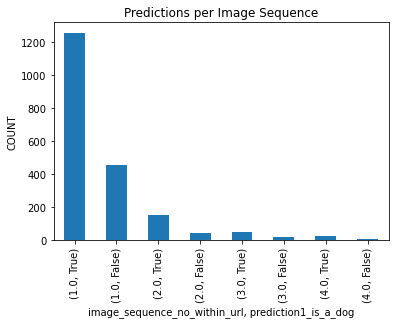

In [162]:
masterdata[['image_sequence_no_within_url','prediction1_is_a_dog']].groupby(['image_sequence_no_within_url'], sort=True).value_counts().plot(kind='bar')
plt.title('Predictions per Image Sequence');
plt.xlabel('image_sequence_no_within_url, prediction1_is_a_dog')
plt.ylabel('COUNT');
masterdata[['image_sequence_no_within_url','prediction1_is_a_dog']].groupby(['image_sequence_no_within_url'], sort=True).value_counts().to_frame

#### <font color='green'> Insight 3: Dog tweet with highest no of likes </font> 

In [163]:
masterdata['ratings']= masterdata.rating_numerator/masterdata.rating_denominator

In [166]:
masterdata.query('prediction1_is_a_dog == True')[['image_prediction_1', 'favorites', 'tweet_id', 'ratings', 'dog_stage','timestamp']].max().to_frame()

,0
image_prediction_1,wire-haired_fox_terrier
favorites,132810.0
tweet_id,892177421306343426
ratings,2.7
dog_stage,unknown
timestamp,2017-08-01 00:17:27+00:00


#### <font color='green'> The most liked dog tweet contains a picture of a wire-haired_fox_terrier. </font> 

#### <font color='green'> Insight 4 & Visualisation: Six Most common Dog types </font> 

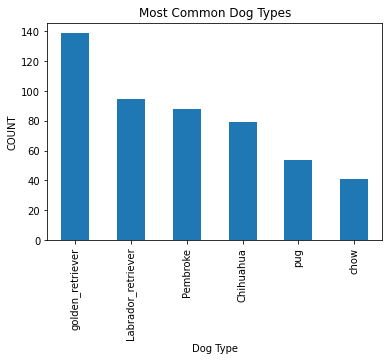

In [167]:
masterdata.query('prediction1_is_a_dog == True').image_prediction_1.value_counts().head(6).plot (kind='bar')
plt.title('Most Common Dog Types');
plt.xlabel('Dog Type')
plt.ylabel('COUNT');

#### <font color='green'> Insight 3: The Ugliest Dogs Based on their ratings. </font> 

In [171]:
masterdata.query('prediction1_is_a_dog == True')[['ratings', 'image_prediction_1']].groupby('image_prediction_1').mean().sort_values ('ratings', ascending =True).head(10)

,ratings
image_prediction_1,
Japanese_spaniel,0.500000
Walker_hound,0.900000
Scotch_terrier,0.900000
Welsh_springer_spaniel,0.900000
Norwich_terrier,0.900000
Ibizan_hound,0.900000
soft-coated_wheaten_terrier,0.918182
Tibetan_terrier,0.925000
miniature_schnauzer,0.925000
